# consurrenceの計算確認

## moduleのimport、パラメータの設定

In [2]:
import numpy as np
import matplotlib.pyplot as plt


c = 3.0 * 10 ** 8
D_plus = 0.055 / c
D = -0.050 / c
L = 3 * 10 ** -3

tau_plus = L * D_plus
tau_minus = L * D / 2

s = "parameters:\n"
s += "c: {:.3e}\n".format(c)
s += "D_plus: {:.3e}\n".format(D_plus)
s += "D: {:.3e}\n".format(D)
s += "L: {:.3e}\n".format(L)
s += "tau_plus: {:.3e}\n".format(tau_plus)
s += "tau_minus: {:.3e}\n".format(tau_minus)
print(s)

parameters:
c: 3.000e+08
D_plus: 1.833e-10
D: -1.667e-10
L: 3.000e-03
tau_plus: 5.500e-13
tau_minus: -2.500e-13



## 被積分関数の定義

In [3]:
def Phi(omega_0, Omega):
    """
    omega_0 [rad/s]
    Omega [rad/s]
    """
    # Be aware that np.sinc(x) returns sin(pi * x) / (pi * x)
    return np.sinc(
        (omega_0 * tau_plus + Omega * tau_minus) / np.pi
    )

def integrand1(omega_0, Omega, sigma_0):
    """
    omega_0 [rad/s]
    Omega [rad/s]
    sigma_0 [rad/s]
    """
    return np.exp(-(2 * omega_0 / sigma_0)) * np.abs(
        Phi(omega_0, Omega) * Phi(omega_0, -Omega)
    )

def integrand2(omega_0, Omega, sigma_0):
    """
    omega_0 [rad/s]
    Omega [rad/s]
    sigma_0 [rad/s]
    """
    return np.exp(-(2 * omega_0 / sigma_0)) * np.abs(
        Phi(omega_0, Omega) ** 2 +  Phi(omega_0, -Omega) ** 2
    )

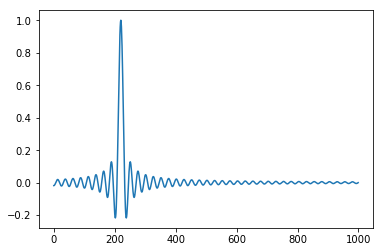

In [16]:
points = np.arange(1, 10 ** 15, 10 ** 12)
val = Phi(10 ** 14, points)

plt.plot(val)

## 積分範囲の見積もり

//anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


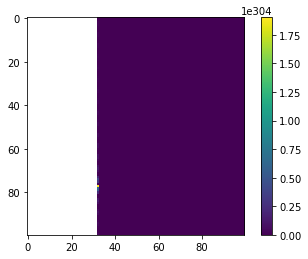

In [8]:
n_omega_0 = 100
n_Omega = 100
omega_0_max = 1 * 10 ** 15  # ~ 300 THz
Omega_max = 1 * 10 ** 15  # ~ 300 THz
sigma_0 = 1 * 10 ** 12

omega_0_points = np.linspace(-omega_0_max, omega_0_max, num=n_omega_0)
Omega_points = np.linspace(0, Omega_max, num=n_Omega)

omega_0_coordinates, Omega_coordinates = np.meshgrid(
    omega_0_points,
    Omega_points
)
image1 = integrand1(
    omega_0_coordinates,
    Omega_coordinates,
    sigma_0,
)

fig = plt.figure()
im = plt.imshow(image1)
plt.colorbar(im)